In [1]:
#is taking three fourier and saying that the flucuations are very similar sufficient?
#plt.savefig("plot")

In [723]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
import datetime
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler
from scipy import signal

In [14]:
DowJonesData = pd.read_csv("Dow Jones Industrial Average Historical Data.csv")
NASDAQData = pd.read_csv("NASDAQ_100_Data_From_2010.csv", delimiter="\t")

In [15]:
NASDAQData.head()
DowJonesData.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 31, 2019","28,538.44","28,414.64","28,547.35","28,376.49",193.34M,0.27%
1,"Dec 30, 2019","28,462.14","28,654.76","28,664.69","28,428.98",185.07M,-0.64%
2,"Dec 27, 2019","28,645.26","28,675.34","28,701.66","28,608.98",184.93M,0.08%
3,"Dec 26, 2019","28,621.39","28,539.46","28,624.10","28,535.15",155.97M,0.37%
4,"Dec 24, 2019","28,515.45","28,572.57","28,576.80","28,503.21",95.29M,-0.13%


In [16]:
DowJonesData["Date"] = pd.to_datetime(DowJonesData['Date'])
DowJonesData["Open"] = DowJonesData["Open"].apply(lambda x: float(x.replace(',', '')))

In [734]:
print("Question 1a)")
#create a Pandas dataframe (name the dataframe “com12”) containing all data in the csv file corresponding to the 12 companies
companies12 = ['AAPL', 'ADBE','AMD', 'AMZN', 'ASML', 'FB', 'GOOG', 'INTC', 'MSFT', 'NVDA', 'PYPL','TSLA']
com12 = NASDAQData[NASDAQData.Name.isin(companies12) ]
com12
#dfi.export(com12, 'com12.png', max_rows = 10)

Question 1a)


,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL
...,...,...,...,...,...,...,...,...
248227,2021-09-03,732.250000,734.000000,724.200012,733.570007,733.570007,15246100,TSLA
248228,2021-09-07,740.000000,760.200012,739.260010,752.919983,752.919983,20039800,TSLA
248229,2021-09-08,761.580017,764.450012,740.770020,753.869995,753.869995,18793000,TSLA
248230,2021-09-09,753.409973,762.099976,751.630005,754.859985,754.859985,14077700,TSLA


In [735]:
#convert date to datetime
pd.options.mode.chained_assignment = None
com12dateTime = com12
com12dateTime["Date"] = pd.to_datetime(com12dateTime['Date'])
com12dateTime["Date"]
com12dateTime["Day"] = com12dateTime["Date"].dt.dayofweek
com12dateTime = com12dateTime.sort_values(by=["Date"])
com12dateTime

,Date,Open,High,Low,Close,Adj Close,Volume,Name,Day
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL,0
29430,2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900,AMZN,0
190702,2010-01-04,4.627500,4.655000,4.527500,4.622500,4.246796,80020400,NVDA,0
2943,2010-01-04,36.650002,37.299999,36.650002,37.090000,37.090000,4710200,ADBE,0
133634,2010-01-04,20.790001,21.030001,20.730000,20.879999,14.678099,47800900,INTC,0
...,...,...,...,...,...,...,...,...,...
118918,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1643500,GOOG,4
193644,2021-09-10,223.479996,226.259995,222.699997,224.779999,224.779999,24814900,NVDA,4
136576,2021-09-10,53.849998,54.980000,53.810001,53.840000,53.840000,20307000,INTC,4
2942,2021-09-10,155.000000,155.479996,148.699997,148.970001,148.970001,140646400,AAPL,4


Question 1b)


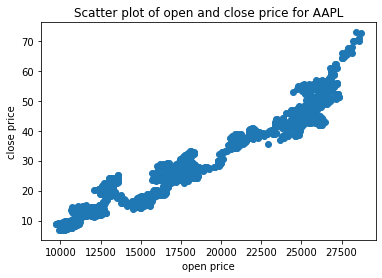

Correlation coefficient of AAPL open and close price is 0.9641974195836246


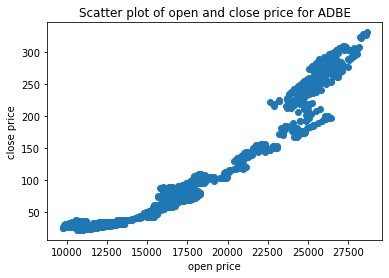

Correlation coefficient of ADBE open and close price is 0.954952937196089


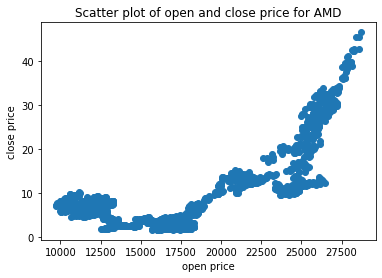

Correlation coefficient of AMD open and close price is 0.7278684915240142


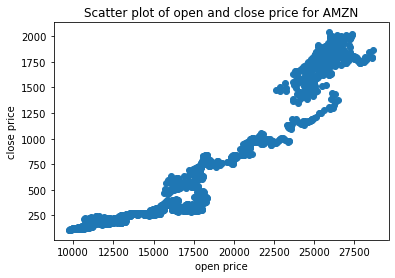

Correlation coefficient of AMZN open and close price is 0.9481892712341211


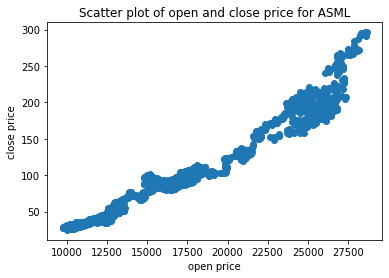

Correlation coefficient of ASML open and close price is 0.978306400377268


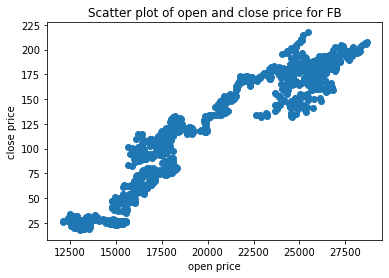

Correlation coefficient of FB open and close price is 0.9440182919212817


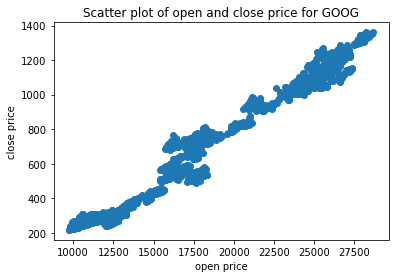

Correlation coefficient of GOOG open and close price is 0.9820904499813787


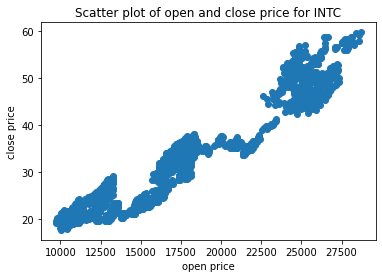

Correlation coefficient of INTC open and close price is 0.9525125409829914


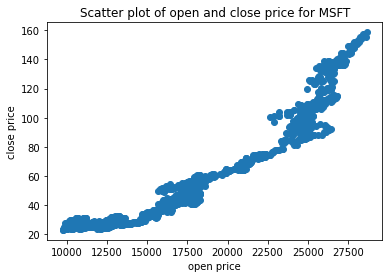

Correlation coefficient of MSFT open and close price is 0.948034855975061


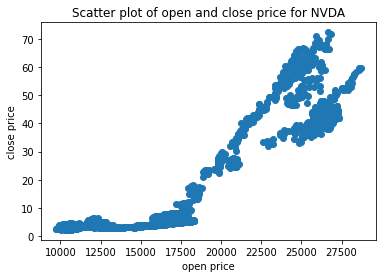

Correlation coefficient of NVDA open and close price is 0.8914887162174195


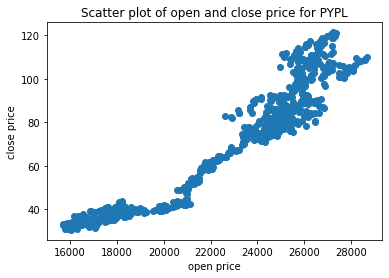

Correlation coefficient of PYPL open and close price is 0.9542218504261344


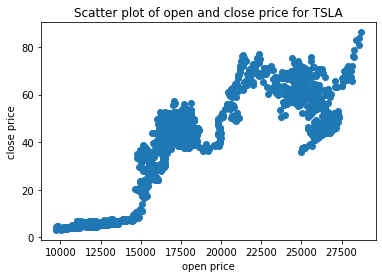

Correlation coefficient of TSLA open and close price is 0.8672492932693232


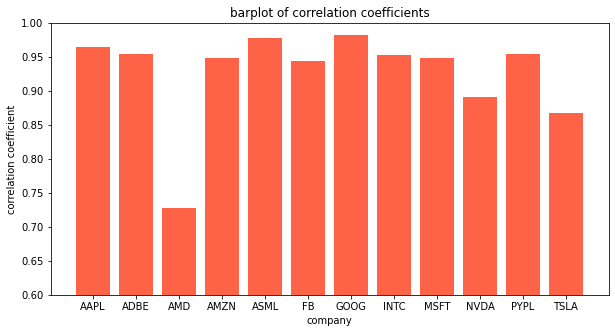

In [736]:
#plot the correlation of the “close” stock prices of each of the 12 companies with the next day open price of DJIA
print("Question 1b)")
listCorrelations = []
for i in companies12:
    closePrice = com12dateTime[(com12dateTime["Day"] != 4) & (com12dateTime["Name"] == i)]
    openPrice = DowJonesData
    for j in openPrice["Date"]:
        if(not (j - datetime.timedelta(days=1)) in closePrice['Date'].unique()):
            indexVal = openPrice[openPrice["Date"] == j].index.values
            openPrice = openPrice.drop(index = indexVal[0])

    for j in closePrice["Date"]:
        if(not (j + datetime.timedelta(days=1)) in openPrice['Date'].unique()):
            closePrice = closePrice.drop(closePrice.index[closePrice["Date"] == j])

    closePrice = closePrice.sort_values(by=["Date"])["Close"]
    openPrice = openPrice.sort_values(by=["Date"])["Open"]

    plt.scatter(openPrice, closePrice)
    plt.title(f"Scatter plot of open and close price for {i}")
    plt.xlabel("open price")
    plt.ylabel("close price")
    #plt.savefig(f"{i}")
    plt.show()
    compCorrelation = np.corrcoef(closePrice,openPrice)[0,1]
    listCorrelations.append(compCorrelation)
    print("Correlation coefficient of", i, "open and close price is", compCorrelation)

fig, ax = plt.subplots()
plt.bar(companies12,listCorrelations, color="tomato")
plt.xlabel("company")
plt.ylabel("correlation coefficient")
plt.title("barplot of correlation coefficients")
plt.ylim(0.6,1)
fig.set_size_inches(10, 5)
#plt.savefig("correlationsplot")
plt.show()

In [737]:
#create pandas dataframe of close stock price com12month
print("Question 1ci)")
com12month = []
com12month = pd.DataFrame(com12month)
tempDF = com12

x = tempDF[tempDF["Name"] == "AAPL"]
x = ((x.filter(["Close", "Date"])))
x = x.groupby(pd.Grouper(key='Date', axis=0, freq='M')).mean()
com12month = x
com12month = com12month.rename({'Close': 'AAPL'}, axis=1)

for i in range(len(companies12) - 1):
    tempDF2 = tempDF[tempDF["Name"] == companies12[i + 1]]
    tempDF2 = ((tempDF2.filter(["Close", "Date"])))
    tempDF2 = tempDF2.groupby(pd.Grouper(key='Date', axis=0, freq='M')).mean()
    com12month = pd.concat([com12month, tempDF2], axis=1, join="inner")
    com12month = com12month.rename({'Close': companies12[i + 1]}, axis=1)

com12month.index = com12month.index.to_period('m')
com12month

Question 1ci)


,AAPL,ADBE,AMD,AMZN,ASML,FB,GOOG,INTC,MSFT,NVDA,PYPL,TSLA
Date,,,,,,,,,,,,
2015-07,31.333864,81.071818,1.960000,478.709095,101.088182,92.055000,590.093636,29.272273,45.611818,4.958182,37.338500,53.319909
2015-08,28.348691,81.752381,1.880952,518.464765,93.138096,91.778572,636.838097,28.366190,45.506667,5.555000,36.945714,48.910095
2015-09,28.199405,80.371904,1.796190,520.955718,89.487143,91.446191,617.934756,29.100952,43.561428,5.730833,33.593333,50.581239
2015-10,28.340000,86.005909,1.991364,566.743181,90.160000,97.129545,663.592718,32.938182,48.700909,6.765909,33.995455,44.396546
2015-11,29.540625,90.896500,2.164500,657.695499,93.130500,105.968999,735.388498,33.686000,53.885000,7.601125,36.127000,44.176400
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05,126.784000,489.344499,76.976000,3246.260010,644.137503,317.335997,2352.595496,56.151000,247.395498,146.881999,250.618501,616.753000
2021-06,129.958636,545.707729,83.331363,3367.725431,688.425462,336.425909,2501.394098,56.813636,259.018181,182.186704,275.742730,626.919550
2021-07,145.139524,609.197144,92.046667,3616.006185,713.769520,353.377145,2646.785703,55.245238,281.502385,196.463452,296.913811,659.134760


Question 1cii)


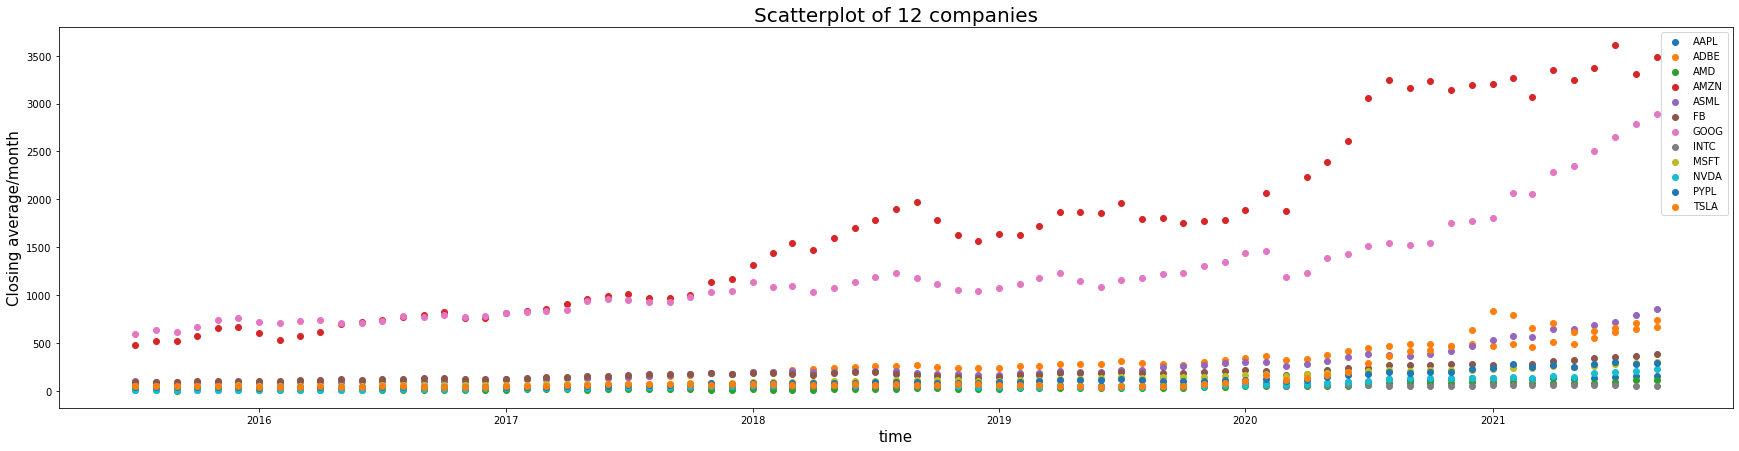

In [738]:
#plot scatterplot to see how we can potentially run K-means
print("Question 1cii)")
com12month.index = com12month.index.to_timestamp()
fig, ax = plt.subplots()
for company in companies12:
    ax.scatter(com12month.index, com12month[company], label = company)
plt.xlabel("time", fontsize=15)
plt.ylabel("Closing average/month", fontsize=15)
plt.title("Scatterplot of 12 companies", fontsize=20)
ax.legend()
fig.set_size_inches(30, 7)
#plt.savefig("scatterplot of 12 companies by month", dpi = 750)
plt.show()

K MEANS CLUSTERING


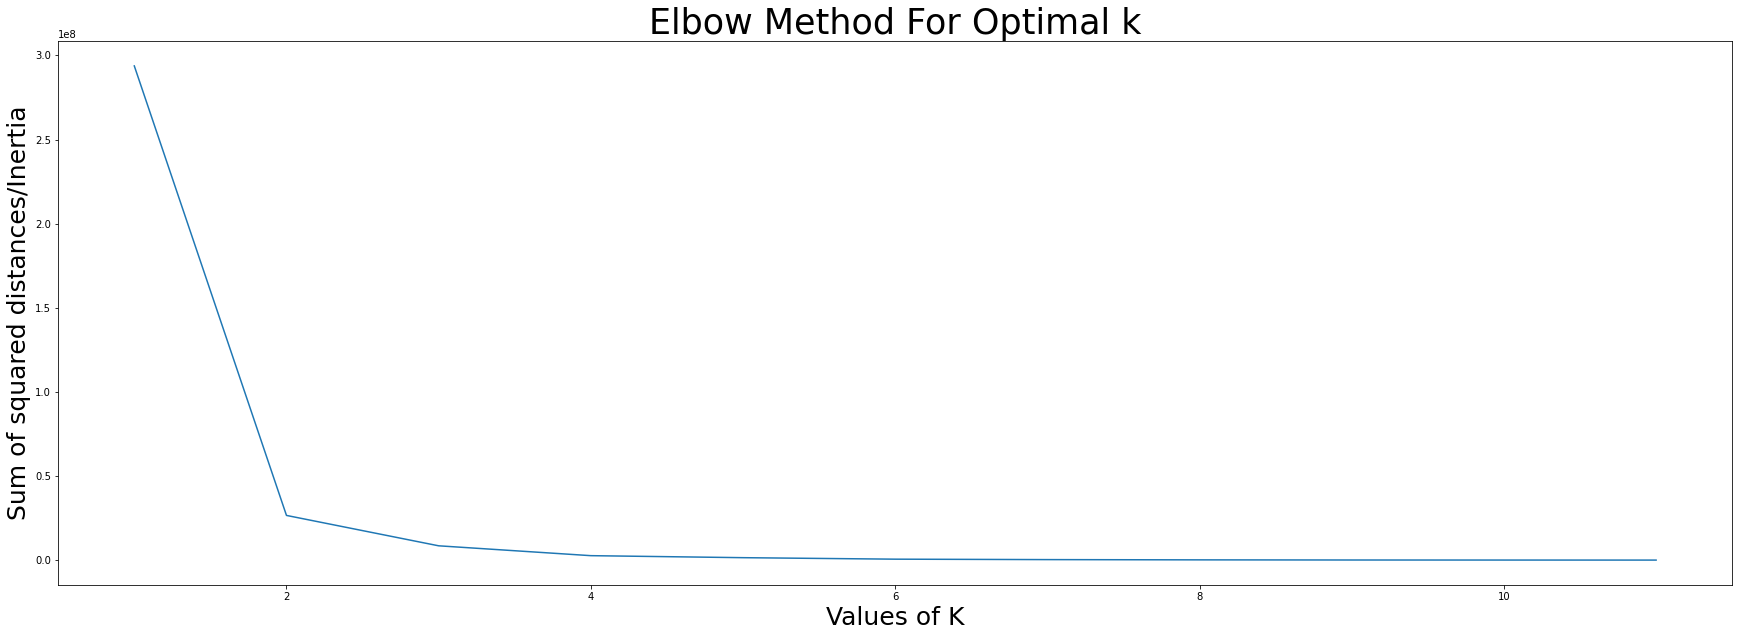

4 is where the the graph starts to taper off, hence we use optimal value of k = 4
[1 3 1 0 3 1 2 1 1 1 1 3]
Index(['AAPL', 'ADBE', 'AMD', 'AMZN', 'ASML', 'FB', 'GOOG', 'INTC', 'MSFT',
       'NVDA', 'PYPL', 'TSLA'],
      dtype='object')
we now have the clusters of groups according to their trends that we can categorise later for price prediction
AAPL AMD FB INTC MSFT NVDA PYPL belong to one cluster
AMZN belong to one cluster
GOOG belong to one cluster
ADBE ASML TSLA belong to one cluster
Centroids to the 10 clusters are:
[[ 478.70909535  518.46476528  520.95571754  566.74318071  657.69549866
   669.26227916  601.06157805  530.61999969  572.37409002  613.59428769
   697.4738072   716.39045299  741.46749878  764.83912725  788.96523321
   824.43905494  763.33523996  763.32524182  807.50500183  835.74526817
   854.24000085  903.38579037  961.71954623  990.44408902 1008.48399658
   971.43652344  968.99249878 1000.71999567 1139.80809966 1168.8414917
  1309.01094564 1442.36314633 1540.367629

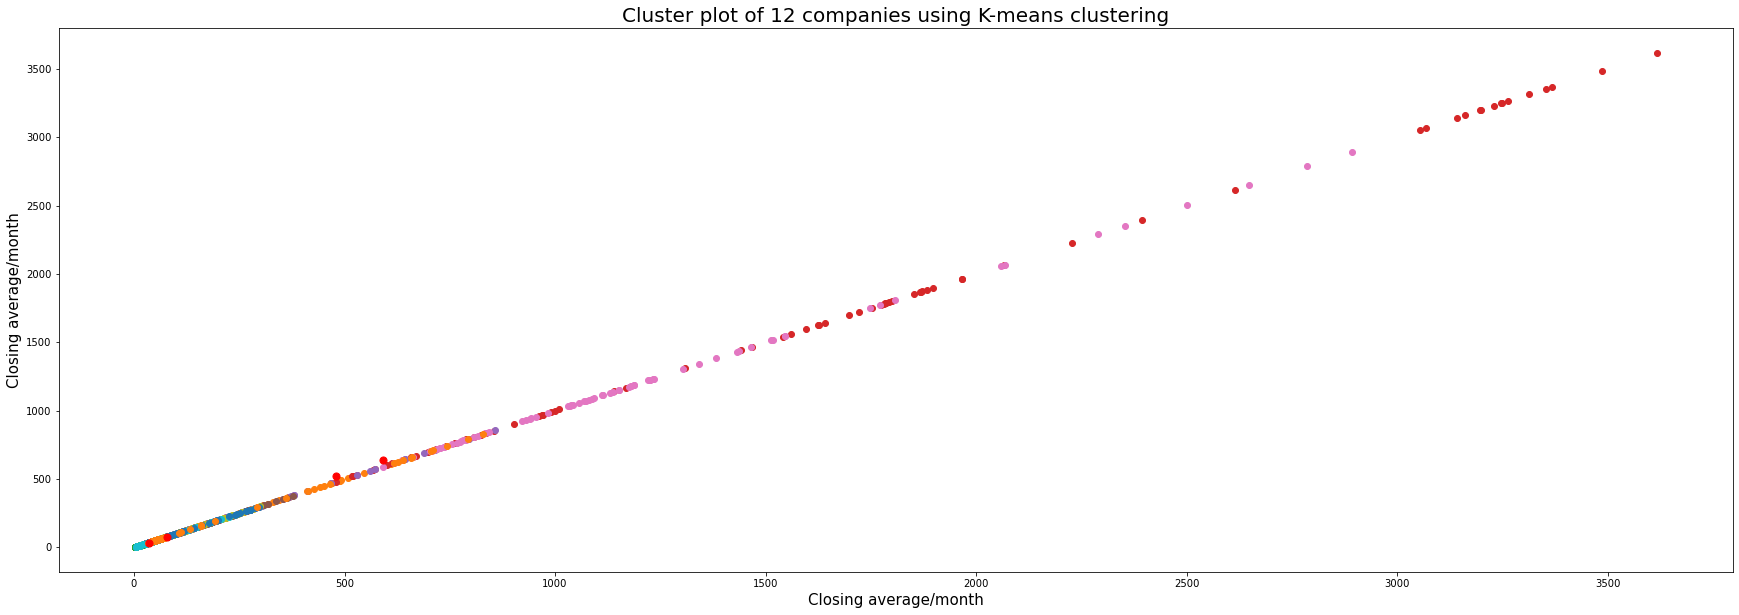

In [739]:
#run K-Means clustering
print("K MEANS CLUSTERING")
com12monthArray = com12month.to_numpy()
com12monthArray = []

for company in com12month.columns:
    com12monthArray.append(com12month[company].values)

Sum_of_squared_distances = []
K = range(1,12)

fig, ax = plt.subplots()
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(com12monthArray)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel("Values of K" , fontsize = 25)
plt.ylabel("Sum of squared distances/Inertia" , fontsize = 25)
plt.title("Elbow Method For Optimal k" , fontsize = 35)
fig.set_size_inches(30, 10)
#plt.savefig("kmeans clustering")
plt.show()

print("4 is where the the graph starts to taper off, hence we use optimal value of k = 4")

kmeans = KMeans(n_clusters=4).fit(com12monthArray)
centroids = kmeans.cluster_centers_
y_kmeans = kmeans.predict(com12monthArray)
print(y_kmeans)
print(com12month.columns)
print("we now have the clusters of groups according to their trends that we can categorise later for price prediction")

print("AAPL AMD FB INTC MSFT NVDA PYPL belong to one cluster")
print("AMZN belong to one cluster")
print("GOOG belong to one cluster")
print("ADBE ASML TSLA belong to one cluster")

print("Centroids to the 10 clusters are:")
print(centroids)

fig, ax = plt.subplots()
for company in companies12:
    ax.scatter(com12month[company], com12month[company])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("Closing average/month", fontsize=15)
plt.ylabel("Closing average/month", fontsize=15)
plt.title("Cluster plot of 12 companies using K-means clustering", fontsize=20)
fig.set_size_inches(30, 10)
plt.show()

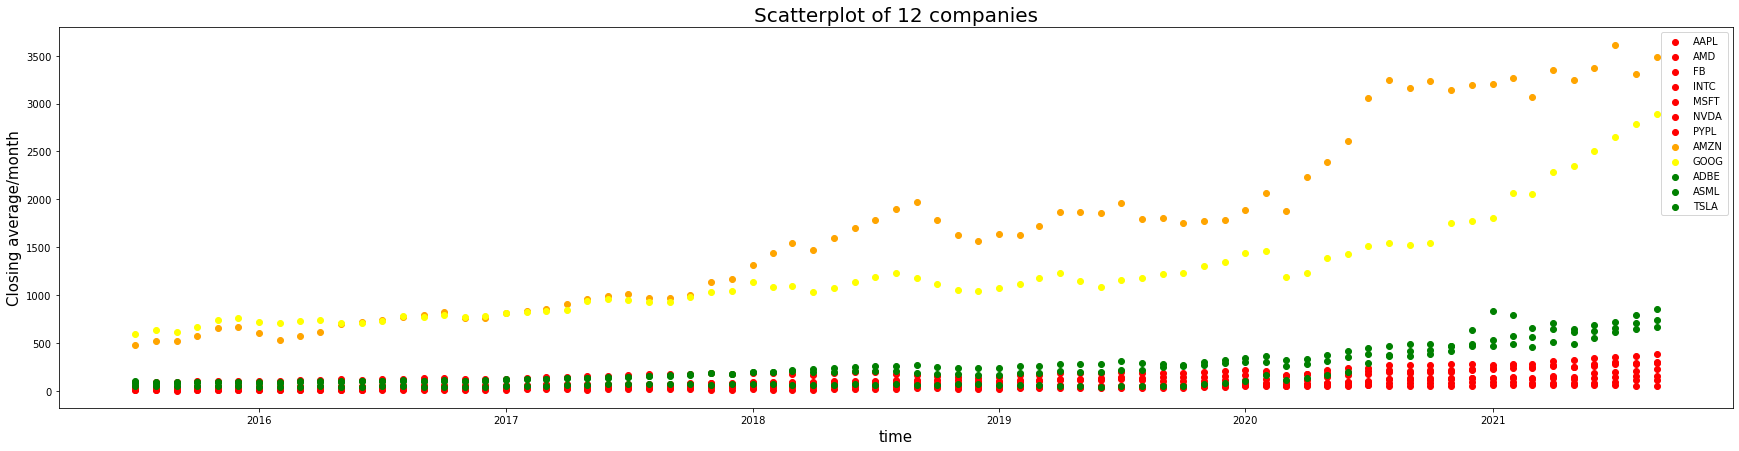

In [740]:
#replot K-Means cluster chart
fig, ax = plt.subplots()
cluster1 = com12month[["AAPL", "AMD", "FB", "INTC", "MSFT", "NVDA", "PYPL"]]
cluster2 =  com12month[["AMZN"]]
cluster3 =  com12month[["GOOG"]]
cluster4 =  com12month[["ADBE", "ASML", "TSLA"]]

for company in cluster1:
    ax.scatter(com12month.index, com12month[company], label = company, color = "red")
for company in cluster2:
    ax.scatter(com12month.index, com12month[company], label = company, color = "orange")
for company in cluster3:
    ax.scatter(com12month.index, com12month[company], label = company, color = "yellow")
for company in cluster4:
    ax.scatter(com12month.index, com12month[company], label = company, color = "green")
plt.xlabel("time", fontsize=15)
plt.ylabel("Closing average/month", fontsize=15)
plt.title("Scatterplot of 12 companies", fontsize=20)
ax.legend()
fig.set_size_inches(30, 7)
#plt.savefig("scatterplot of 12 companies by month post clustered", dpi = 750)
plt.show()

In [741]:
#NAS2020 dataframe
print("Question 2a)")
print("Close stock prices all year round:")
Nas2020 = NASDAQData[NASDAQData.Date.str.contains("2020")].filter(items=['Date','Close','Name'])
companiesInNasdaqData = Nas2020['Name'].unique()
Nas2020
# dfi.export(Nas2020, 'Nas2020.png', max_rows = 10)

Question 2a)
Close stock prices all year round:


,Date,Close,Name
2516,2020-01-02,75.087502,AAPL
2517,2020-01-03,74.357498,AAPL
2518,2020-01-06,74.949997,AAPL
2519,2020-01-07,74.597504,AAPL
2520,2020-01-08,75.797501,AAPL
...,...,...,...
271501,2020-12-24,375.170013,ZM
271502,2020-12-28,351.390015,ZM
271503,2020-12-29,353.750000,ZM
271504,2020-12-30,353.399994,ZM


In [742]:
#close price of average weekly
print("Question 2b)")
print("Dataframe of average close stock prices per week:")
Nas2020['Date'] = pd.to_datetime(Nas2020['Date'])
Nas2020weekseries = Nas2020.groupby(['Name', pd.Grouper(key='Date', freq='W-MON')])['Close'].mean()

Nas2020weekdict = {}

for company in companiesInNasdaqData:
    Nas2020weekdict[company] = Nas2020weekseries[company].values
Nas2020week = pd.DataFrame(data=Nas2020weekdict, index=Nas2020weekseries[company].index)
Nas2020week

Question 2b)
Dataframe of average close stock prices per week:


,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,74.798332,333.316661,118.553332,170.156672,186.633331,93.496666,283.333333,61.100000,48.696665,239.623337,...,88.320666,128.126668,152.216665,200.116669,220.486664,59.250001,168.463338,62.550001,99.399999,68.773333
2020-01-13,76.925000,339.430005,119.706001,170.500003,190.839999,93.989999,291.400000,61.690001,48.394000,238.073996,...,97.821999,130.089999,156.468002,207.422000,228.115997,55.616001,178.634000,62.682000,99.714000,72.838000
2020-01-20,78.624374,345.672501,118.910000,173.947498,191.937500,96.862499,281.860001,62.584999,49.365000,240.922501,...,104.020498,130.424999,159.160000,212.162498,233.807499,54.469999,180.749996,64.585001,100.672501,75.442501
2020-01-27,79.038002,350.017999,118.073999,177.062003,196.845999,100.850000,270.830005,62.406000,50.759999,231.585999,...,112.472000,131.056000,163.848001,213.214001,231.788000,52.971999,183.826004,66.642000,100.630002,74.036002
2020-02-03,79.203500,354.434003,111.932001,173.935999,198.974002,103.508000,260.486008,59.594000,48.367999,222.213998,...,128.770799,124.399998,164.278000,211.028000,230.450000,51.762000,186.328000,68.408000,88.680000,76.718002
2020-02-10,80.354500,367.167993,114.020000,178.651999,205.026001,102.100000,261.696002,62.925999,50.120000,228.389999,...,155.602802,129.956000,168.939999,211.116000,240.869998,53.094000,191.522000,69.134001,86.754001,87.670000
2020-02-17,81.039375,374.520004,118.054998,179.340000,207.342499,102.655001,271.497498,66.010000,54.382500,225.619999,...,157.285000,132.035000,169.805000,208.032501,243.482502,53.470000,194.782501,69.517500,90.510000,89.442499
2020-02-24,78.707498,374.290002,121.426001,179.013998,204.153998,102.392000,263.987997,64.864001,55.092000,221.492001,...,176.400797,129.160004,169.392001,207.459998,244.421997,51.256000,189.698001,70.762001,88.528000,102.476001
2020-03-02,71.320998,348.411993,111.508000,161.756000,187.951999,94.362000,225.938000,58.790000,46.402000,208.069998,...,146.772800,116.681999,160.076001,193.328000,228.331998,47.057999,173.634000,66.045999,82.813998,109.124001


Question 2c)


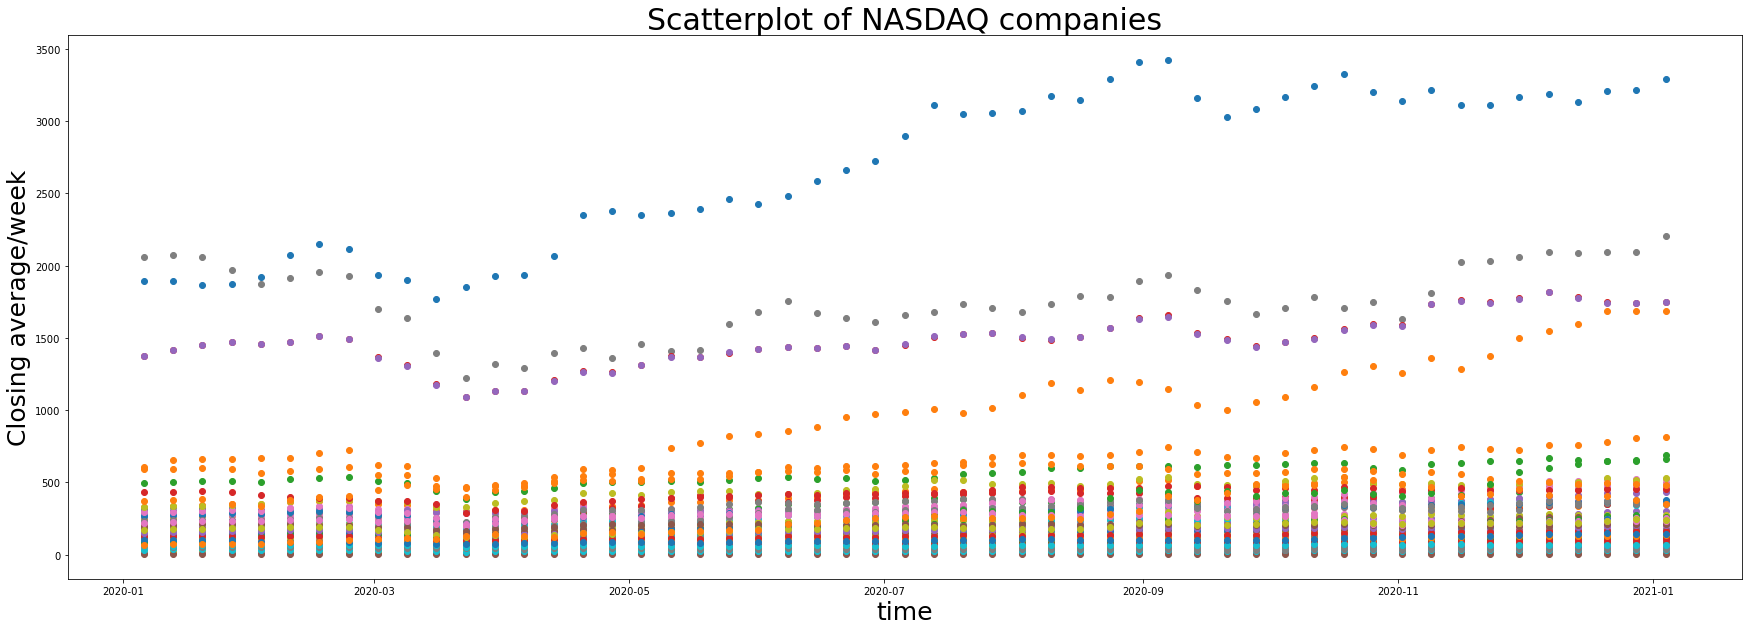

MinMaxScaler()


In [797]:
#Scatterchart to understand visually how we can perform PCA
print("Question 2c)")

vectorOfCompanies = []
fig, ax = plt.subplots()
for company in companiesInNasdaqData:
    ax.scatter(Nas2020week.index, Nas2020week[company], label = company)
    vectorOfCompanies.append(Nas2020week[company].to_numpy())
plt.xlabel("time", fontsize=25)
plt.ylabel("Closing average/week", fontsize=25)
plt.title("Scatterplot of NASDAQ companies", fontsize=30)
#ax.legend(loc="lower left")
fig.set_size_inches(30, 10)
#plt.savefig("scatterplot NASDAQ companies")
plt.show()

#normalize data first
scaler = MinMaxScaler()
print(scaler.fit(vectorOfCompanies))
vectorOfCompanies = scaler.transform(vectorOfCompanies)


In [798]:
#running a PCA, taking companies as vectors
print("PCA of closed prices, one stock per company:")
#covariance matrix
covMatrix = np.cov(vectorOfCompanies)
#eigenvectors and values
eVal, eVect = np.linalg.eig(covMatrix)
eVal_sorted_index = np.argsort(eVal)[::-1]
eVal_sorted = eVal[eVal_sorted_index]
eVect_sorted = eVect[eVal_sorted_index]
PCAs = pd.DataFrame(eVect_sorted).apply(np.real)
#dfi.export(PCAs, 'PCAdataSet.png', max_rows = 10, max_cols = 10)
PCAs

PCA of closed prices, one stock per company:


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,-0.002238,0.026411,-0.008531,-0.024216,-0.003500,0.035059,0.019231,0.000994,-0.052697,0.013874,...,0.006137,0.006137,0.008374,0.001237,0.001237,-0.004910,-0.004910,-0.002842,-0.000066,0.0
1,-0.043831,0.005351,0.052460,-0.085327,0.088759,0.190475,0.051413,-0.036060,0.074954,-0.072151,...,-0.004350,-0.004350,-0.007929,-0.003370,-0.003370,0.005401,0.005401,0.001763,-0.004596,0.0
2,-0.031586,0.002673,0.023375,0.015342,0.011699,-0.007681,-0.050578,-0.006411,0.049193,-0.026261,...,-0.002197,-0.002197,-0.001014,0.000411,0.000411,-0.000801,-0.000801,-0.000666,-0.000980,0.0
3,-0.067985,-0.008135,0.048130,-0.025298,-0.018830,-0.029827,-0.041395,0.008054,0.012291,-0.116643,...,0.034340,0.034340,0.020485,-0.000655,-0.000655,0.001051,0.001051,0.021125,0.001695,0.0
4,-0.030941,0.039542,0.036241,0.069458,0.035812,0.061155,0.025608,-0.043265,0.124067,-0.156743,...,0.045910,0.045910,0.034325,0.032765,0.032765,-0.029118,-0.029118,-0.029265,0.006011,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.065364,0.114456,0.083764,0.014382,-0.216975,-0.004742,-0.075539,-0.201467,-0.155264,-0.188185,...,-0.040505,-0.040505,-0.038274,-0.038886,-0.038886,0.058181,0.058181,0.055756,0.026249,0.0
98,-0.018893,0.049437,-0.019570,0.103417,0.161283,0.172812,0.164092,-0.094904,0.068514,0.008201,...,0.015929,0.015929,0.010382,0.019078,0.019078,0.031162,0.031162,0.011520,-0.020379,0.0
99,-0.031934,0.036526,0.033170,0.055831,-0.027137,-0.072557,-0.086061,-0.010252,0.051461,-0.051333,...,-0.024311,-0.024311,-0.000508,-0.080701,-0.080701,-0.011203,-0.011203,0.038347,0.031898,0.0
100,-0.005671,-0.004381,0.005473,0.001536,-0.005198,0.006982,-0.008321,0.000966,0.000290,-0.011668,...,-0.025869,-0.025869,-0.098345,0.250379,0.250379,-0.167801,-0.167801,0.149527,0.189105,0.0


Question 2d)


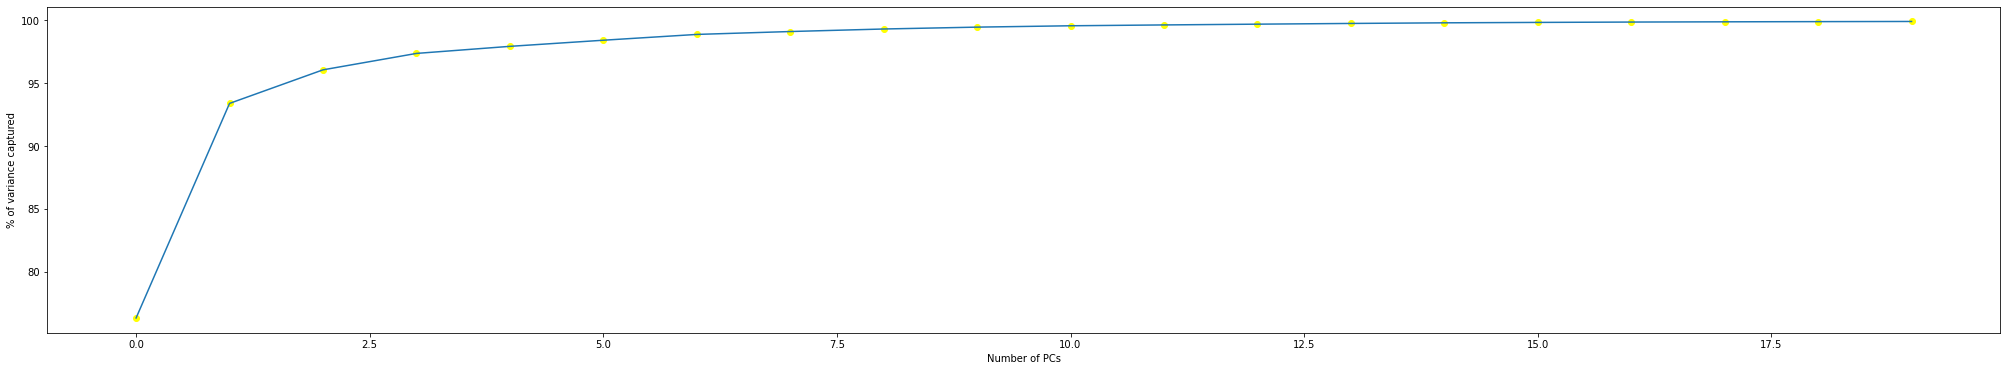

Looking at the elbow graph, the variance seems to taper off at the 11 PCA hence, I will use the top 11 principal components


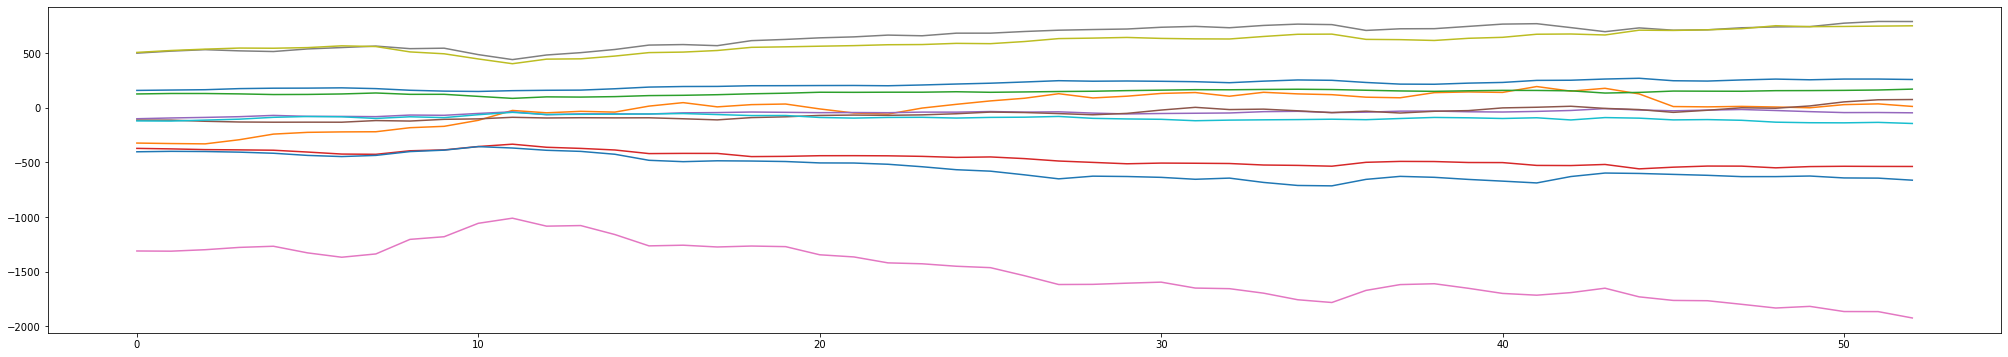

,0,1,2,3,4,5,6,7,8,9,10
0,159.463133,-322.418443,127.078819,-371.138476,-99.763721,-112.534812,-1310.297072,500.669071,507.287379,-119.712510,-402.277454
1,162.894754,-326.886166,131.356393,-375.753950,-92.749448,-112.522314,-1312.066969,519.243056,524.739301,-121.020345,-398.259572
2,165.866302,-329.826004,131.175958,-382.377913,-87.570945,-122.916686,-1298.679228,532.463934,537.195475,-112.249004,-399.864892
3,175.916806,-291.982491,127.628514,-384.754587,-80.962688,-129.540545,-1277.530927,521.615285,547.134181,-103.804290,-405.579179
4,179.723209,-240.446209,121.670700,-387.997084,-69.243983,-131.536206,-1267.000937,515.412645,545.548797,-86.827225,-415.693835
5,180.417609,-224.365244,122.731925,-404.695564,-78.031592,-131.186333,-1327.627594,539.103263,551.308206,-79.188194,-435.391757
6,183.019904,-220.294876,127.043002,-423.114983,-78.455190,-131.550511,-1367.479835,551.747335,567.566943,-82.031167,-446.075057
7,175.899949,-218.858026,135.966760,-425.387150,-80.612717,-116.498313,-1337.392920,565.198536,560.954755,-97.096071,-435.385633
8,160.867461,-181.863290,123.537565,-393.043332,-66.047941,-120.961508,-1204.049314,541.641884,511.960067,-81.903215,-400.411290
9,152.980487,-169.233240,123.765430,-384.922743,-68.310934,-105.149682,-1179.765086,545.954689,494.713753,-89.503381,-387.300847


In [804]:
#deciding how many PCs to use and projecting data
print("Question 2d)")
sum = 0
for i in eVal_sorted:
    sum += abs(i)

#taking more than 0.1% variance of the total data,
eigenvalueWeightage = []
init = 0
varVal = []
x = 0
for i in range(20):
    variance = (round(abs((eVal_sorted[i] * 100)/ sum),3))
    eigenvalueWeightage.append(variance)
    x += variance
    init += 1
    varVal.append(x)
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(35)
plt.xlabel("Number of PCs")
plt.ylabel("% of variance captured")
plt.scatter(list(range(0,init)), varVal, color="yellow")
plt.plot(list(range(0,init)), varVal)
plt.savefig("PCA Variance chart")
plt.show()

numPCA = 11
#dfi.export(PCAs[0:init], 'PCATop8.png', max_rows = 11, max_cols = 10)
print(f"Looking at the elbow graph, the variance seems to taper off at the {numPCA} PCA hence, I will use the top {numPCA} principal components")
finaldataset = np.dot(PCAs[0:numPCA], Nas2020week.T)
finaldataset = pd.DataFrame(finaldataset)
finaldataset = finaldataset.T

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(35)
plt.plot(finaldataset)
plt.savefig("Dimension reduced graph")
plt.show()

finaldataset
#dfi.export(finaldataset, 'finaldataset.png', max_rows=11, max_cols=10)

Question 3)


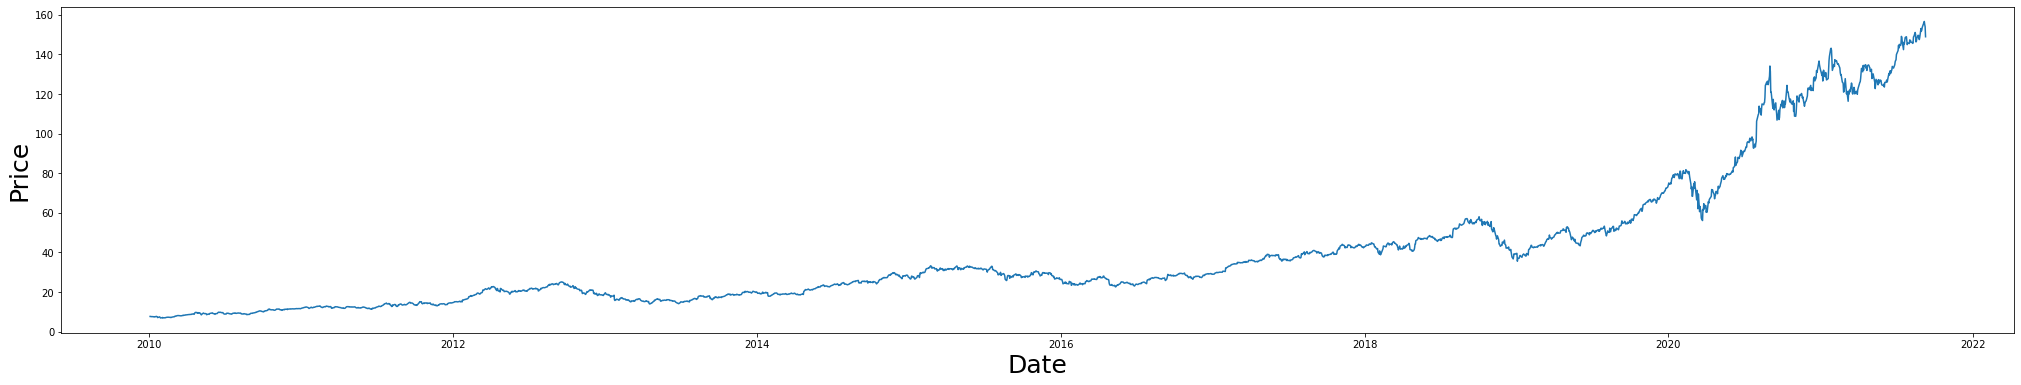

In [796]:
#running AAPL prices over time to decide when and where to derive fourier analysis
print("Question 3)")
AAPLData = NASDAQData[NASDAQData["Name"] == "AAPL"]
AAPLData['Date'] = pd.to_datetime(AAPLData['Date'])

fig = plt.figure()
plt.plot(AAPLData["Date"],AAPLData["Close"])
#plt.title('Graph of stock prices', fontsize=20)
plt.xlabel('Date' , fontsize=25)
plt.ylabel('Price' , fontsize=25)
fig.set_figheight(6)
fig.set_figwidth(35)
#plt.savefig("Graph of appl stock prices")
plt.show()

 frequency trends from the recent days to see how sporadic the prices are


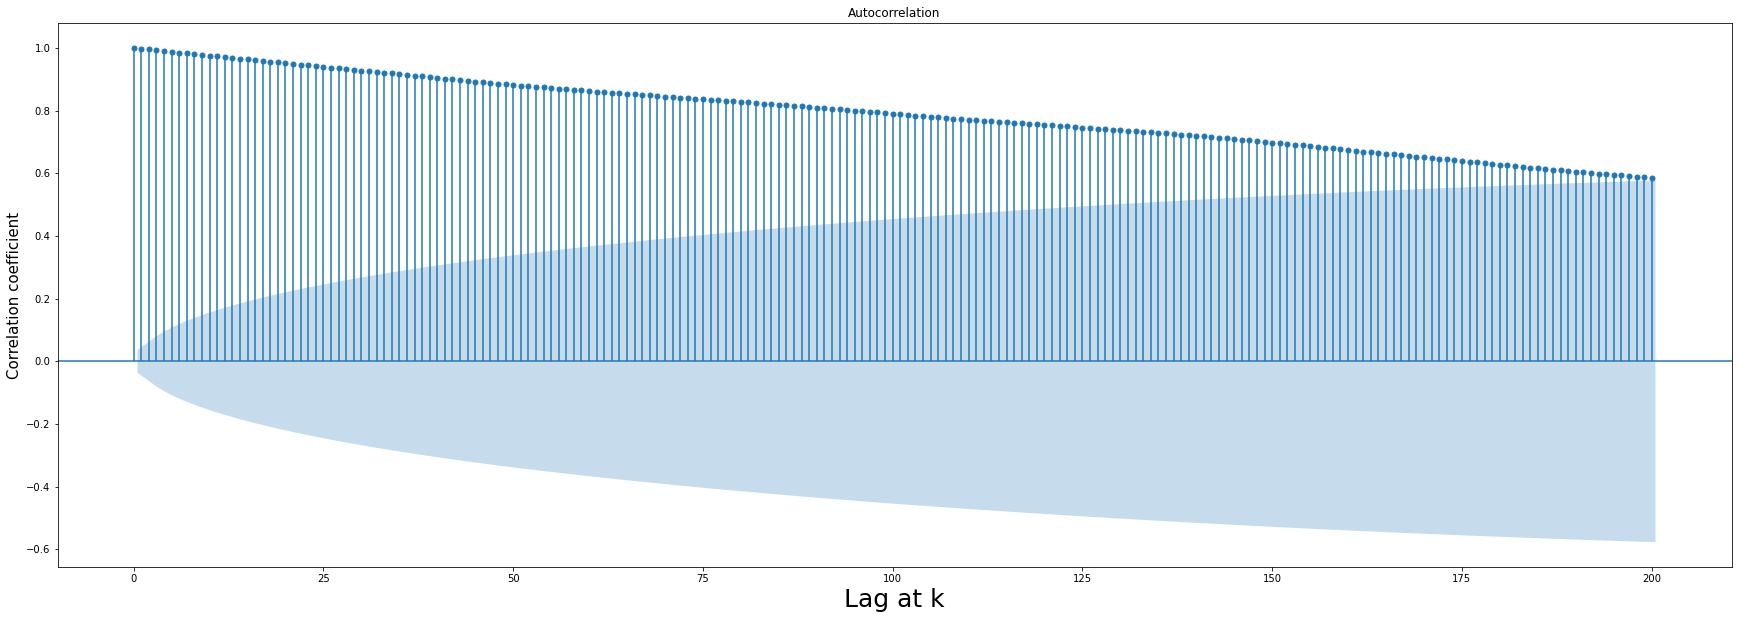

In [759]:
#deciding how to window the fourier
print(" frequency trends from the recent days to see how sporadic the prices are")
from statsmodels.graphics import tsaplots

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(AAPLData["Close"], lags=200)

plt.xlabel("Lag at k", fontsize = 25)
plt.ylabel("Correlation coefficient", fontsize = 15)
fig.set_size_inches(30, 10)
#plt.savefig("correlation graph")
plt.show()

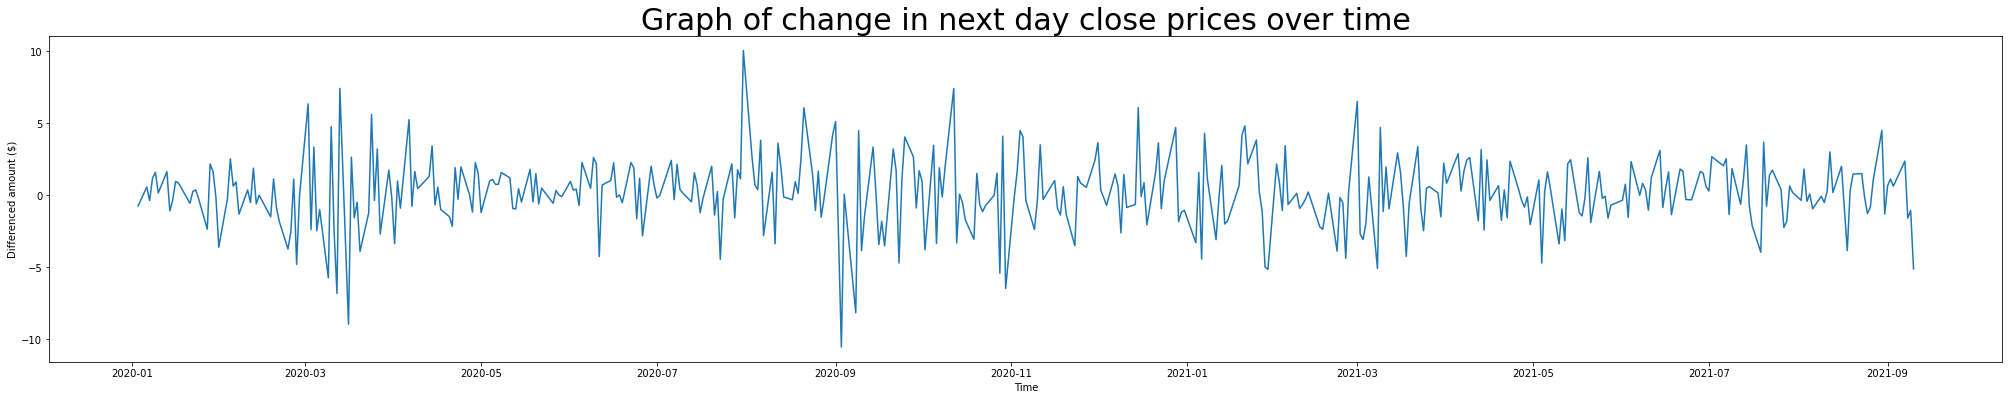

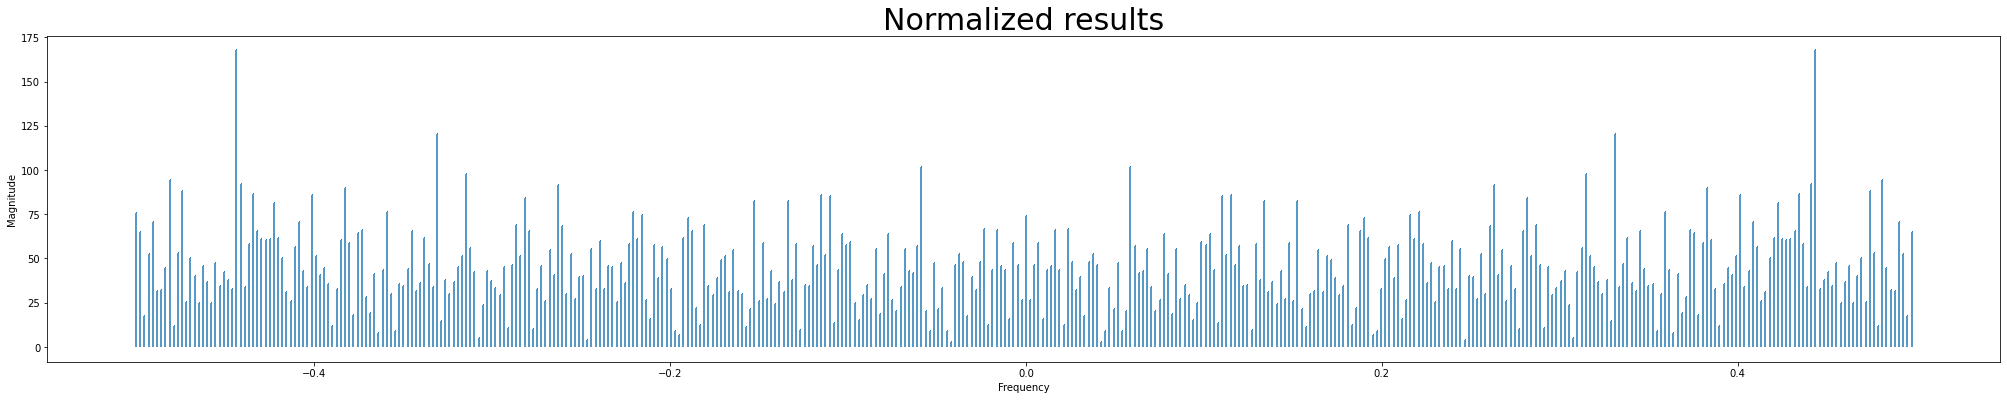

max frequency point is: 0.44366197183098594


In [763]:
#overall fourier transfrom
from scipy.fft import fft, fftfreq, fftshift
binnedResult = []

AAPLData2020 = AAPLData[AAPLData["Date"] > datetime.datetime(2020, 1, 1)].filter(["Date", "Close"])
AAPLData2020.index = AAPLData2020["Date"]
AAPLData2020 =  AAPLData2020.filter(["Close"]).diff(periods=1)[1:]

fig = plt.figure()
plt.plot(AAPLData2020.index, AAPLData2020["Close"])
plt.title("Graph of change in next day close prices over time", fontsize = 30)
plt.xlabel("Time")
plt.ylabel("Differenced amount ($)")
fig.set_figheight(6)
fig.set_figwidth(35)
#plt.savefig("Change in price against time")
plt.show()

fig = plt.figure()
binnedResult = AAPLData2020["Close"].to_numpy()
yf = fft(binnedResult)
N = len(binnedResult)
xf = fftfreq(N,1)
plt.title("Normalized results", fontsize = 30)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
fig.set_figheight(6)
fig.set_figwidth(35)
plt.stem(xf, np.abs(yf) ,basefmt=" ", markerfmt=",")
#plt.savefig("Fourier analysis over time")
plt.show()
print("max frequency point is:",xf[np.where(max(np.abs(yf)) == np.abs(yf))][0])


to see if there are changes in the fluctuations of close prices, we take three samples within the year 2020


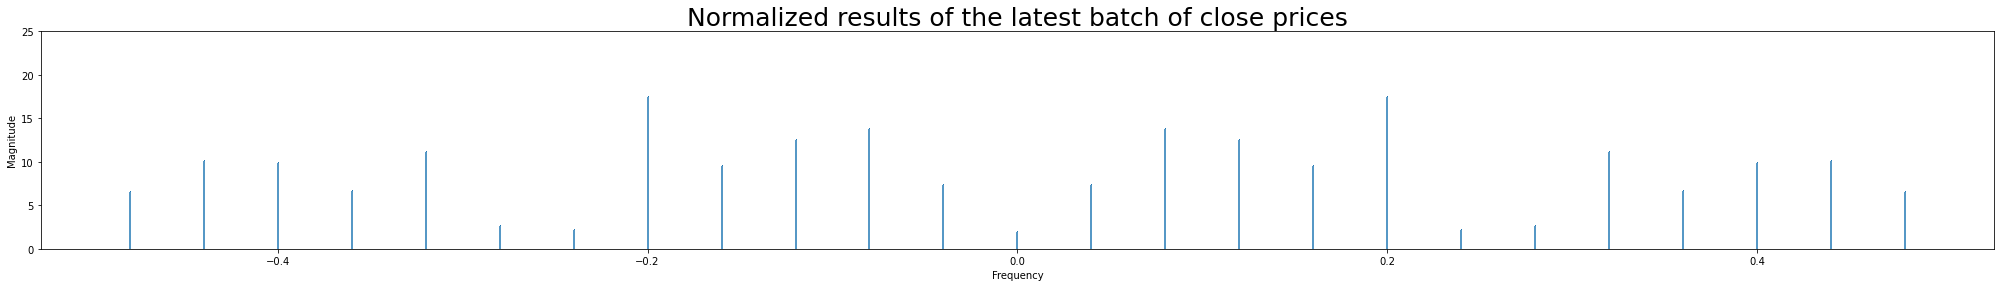

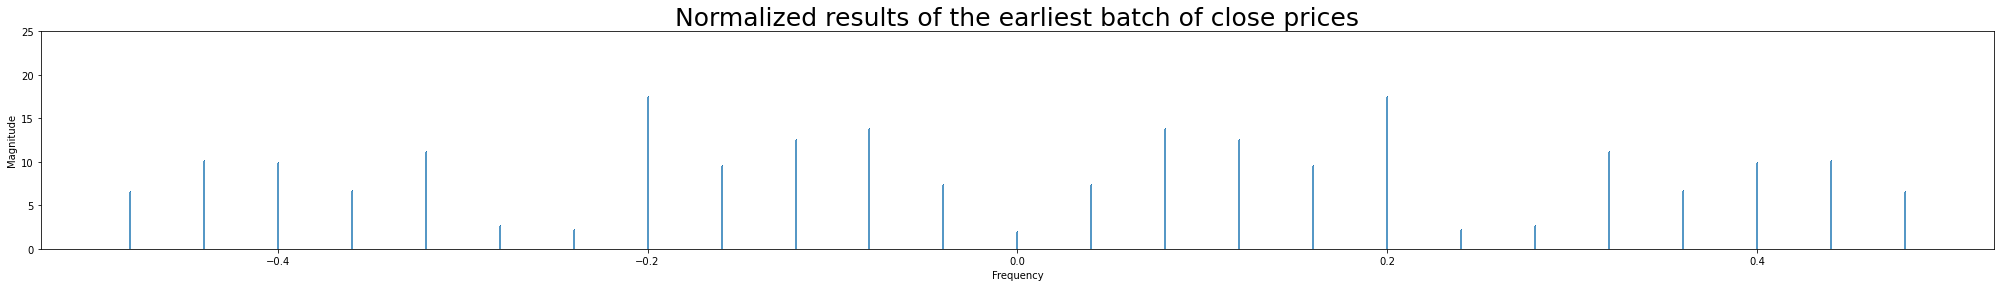

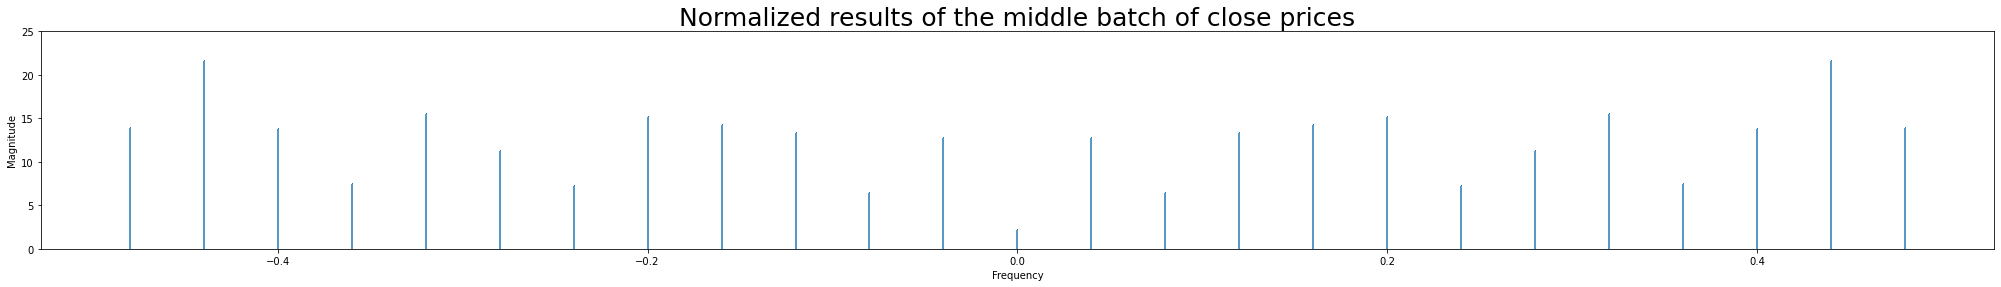

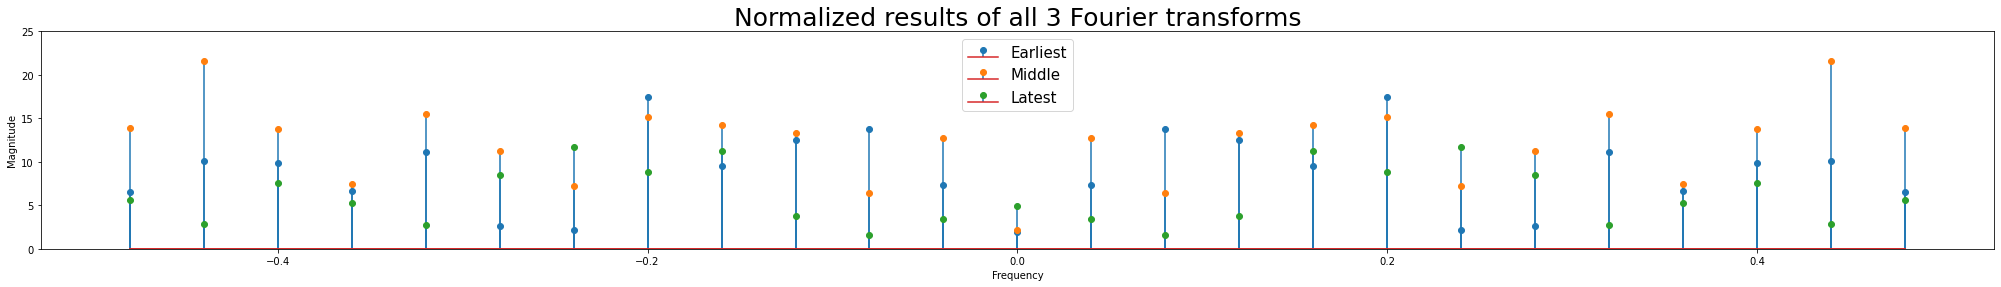

In [764]:
#Fourier transform per 25 days
print("to see if there are changes in the fluctuations of close prices, we take three samples within the year 2020")
AAPLData2020 = AAPLData[AAPLData["Date"] > datetime.datetime(2020, 1, 1)]

#latest
binnedResult2 = []
fig, ax = plt.subplots()
LateAAPLData = AAPLData2020.nlargest(26,"Date")
binnedResult2 = LateAAPLData["Close"].diff(periods=1)[1:].to_numpy()
yf = fft(binnedResult2)
N = len(binnedResult2)
xf = fftfreq(25,1)
plt.title("Normalized results of the latest batch of close prices", fontsize = 25)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.ylim(ymin=0,ymax=25)
plt.stem(xf, np.abs(yf) ,basefmt=" ", markerfmt=",")
fig.set_figheight(4)
fig.set_figwidth(35)
#plt.savefig("fourier of latest")
plt.show()

#earliest
binnedResult3 = []
fig, ax = plt.subplots()
early2020data = AAPLData2020.nsmallest(26,"Date")
binnedResult3 = early2020data["Close"].diff(periods=1)[1:].to_numpy()
N2 = len(binnedResult3)
xf = fftfreq(25,1)
plt.title("Normalized results of the earliest batch of close prices", fontsize = 25)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.ylim(ymin=0,ymax=25)
plt.stem(xf, np.abs(yf) ,basefmt=" ", markerfmt=",")
fig.set_figheight(4)
fig.set_figwidth(35)
#plt.savefig("fourier of earliest")
plt.show()

#middle
binnedResult4 = []
fig, ax = plt.subplots()
size = len(AAPLData2020["Close"])
binnedResult4 = AAPLData2020["Close"].diff(periods=1)[1:].to_numpy()[round((size/2)-(25/2)):round((size/2)+(25/2))]
yf = fft(binnedResult4)
xf = fftfreq(25,1)
plt.title("Normalized results of the middle batch of close prices", fontsize = 25)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.ylim(ymin=0,ymax=25)
plt.stem(xf, np.abs(yf) ,basefmt=" ", markerfmt=",")
fig.set_figheight(4)
fig.set_figwidth(35)
#plt.savefig("fourier of middle")
plt.show()

fig, ax = plt.subplots()
plt.title("Normalized results", fontsize = 25)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

#earliest
yf2 = fft(binnedResult2)
N2 = len(binnedResult2)
xf2 = fftfreq(N2,1)
plt.stem(xf2, np.abs(yf2) ,  label="Earliest",  markerfmt='o')

#middle
yf = fft(binnedResult4)
N = len(binnedResult4)
xf = fftfreq(N,1)
plt.stem(xf, np.abs(yf) ,  label="Middle", markerfmt='o')

#latest
N3 = len(binnedResult3)
xf3 = fftfreq(N3,1)
yf3 = fft(binnedResult3)
plt.stem(xf3, np.abs(yf3), label="Latest", markerfmt='o')

plt.title("Normalized results of all 3 Fourier transforms", fontsize = 25)
plt.ylim(ymin=0,ymax=25)
fig.set_figheight(4)
fig.set_figwidth(35)
ax.legend(prop={'size': 15})
#plt.savefig("fourier of all")
plt.show()

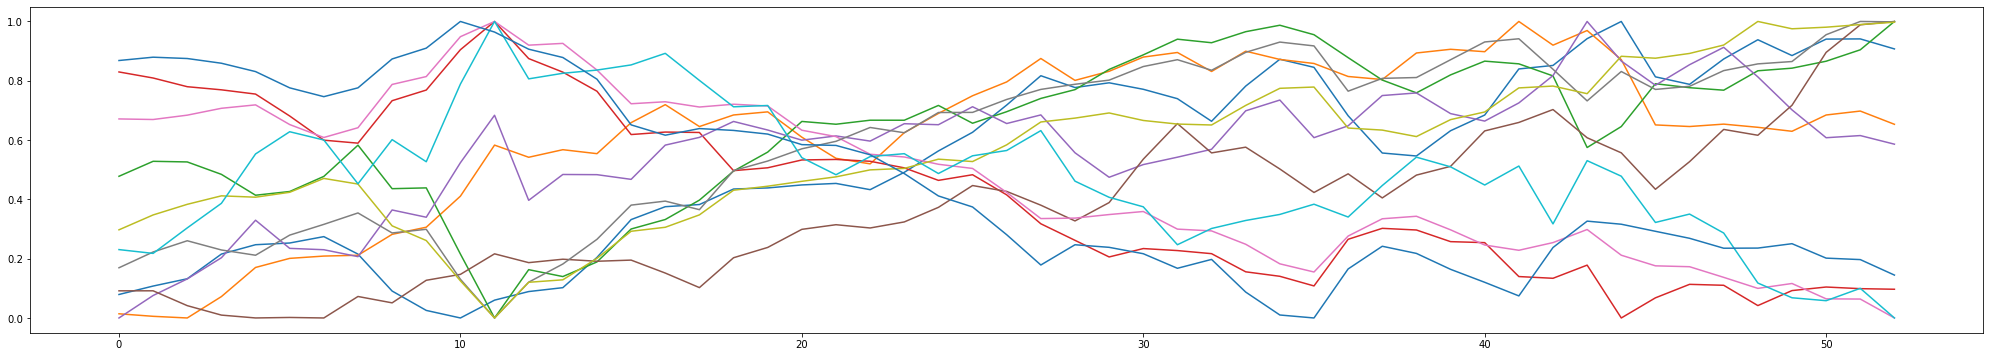

In [748]:
scaler = MinMaxScaler()
scaler.fit(finaldataset)
scaledDataSet = scaler.transform(finaldataset)

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(35)
plt.plot(scaledDataSet)
#plt.savefig("Scaled dimension reduced graph")
plt.show()

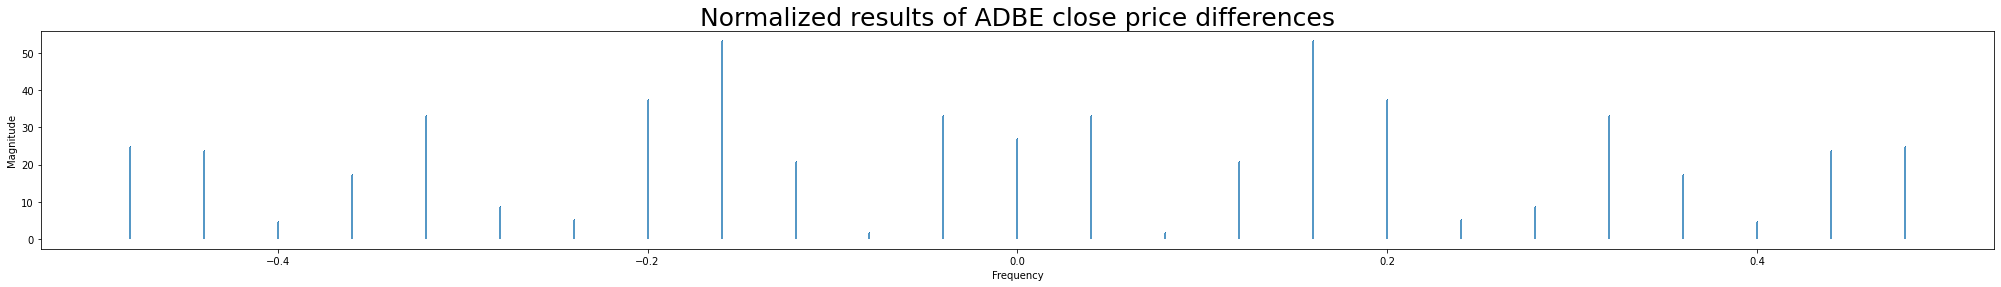

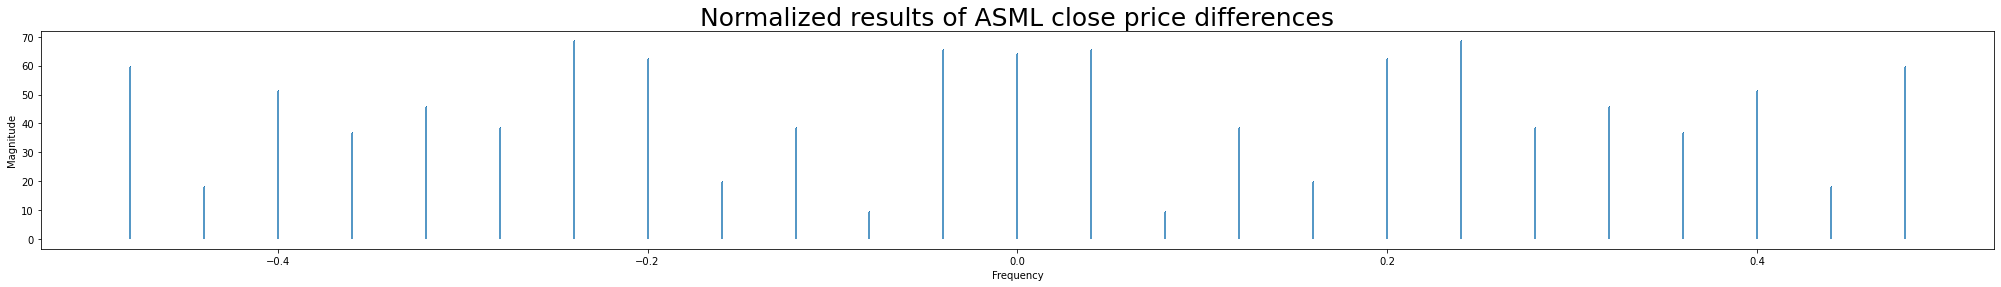

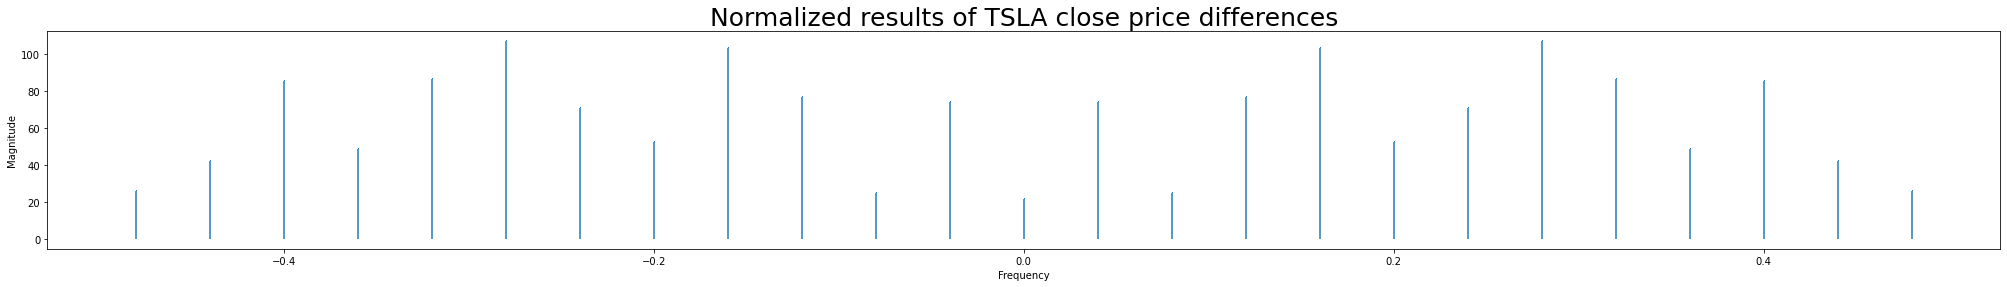

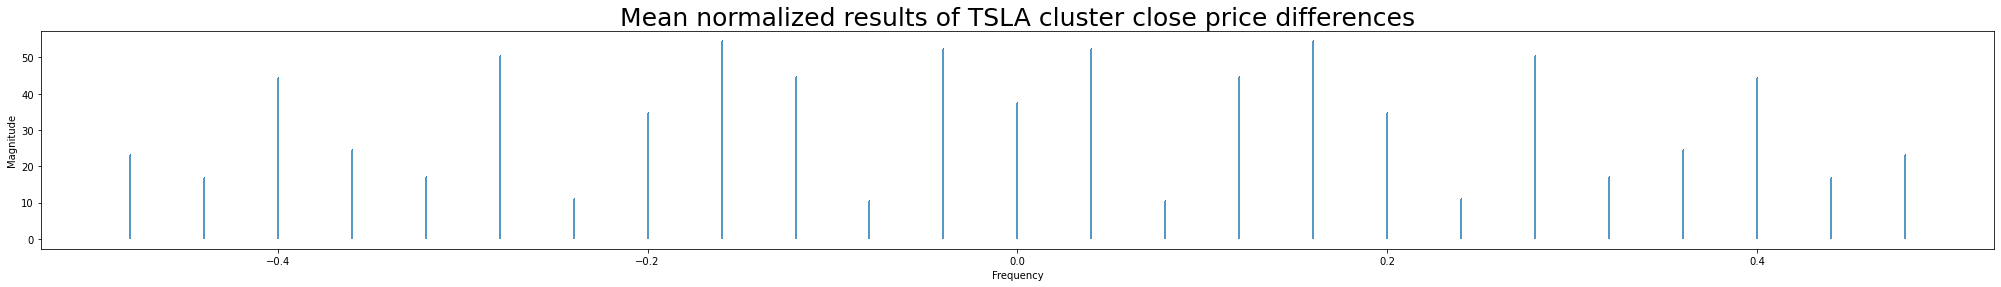

In [760]:
cluster = ["ADBE", "ASML" ]

closevalofclusters = com12[com12["Name"] == "TSLA"]
closevalofclusters.index = closevalofclusters["Date"]
closevalofclusters = closevalofclusters.filter(["Close","Date"])
closevalofclusters = closevalofclusters.rename({'Close': 'TSLA'}, axis=1)
for company in cluster:
    tempDF = com12[com12["Name"] == company]
    tempDF.index = tempDF["Date"]
    tempDF = tempDF.filter(["Close"])
    closevalofclusters =  pd.concat([closevalofclusters, tempDF], axis=1, join="inner")
    closevalofclusters = closevalofclusters.rename({'Close': company}, axis=1)
    closevalofclusters = closevalofclusters.nlargest(26,"Date")

binnedResult2 = []
fig, ax = plt.subplots()
LateADBEData = closevalofclusters["ADBE"]
binnedResult2 = LateADBEData.diff(periods=1)[1:].to_numpy()
yf1 = fft(binnedResult2)
N = len(binnedResult2)
xf1 = fftfreq(N,1)
plt.title("Normalized results of ADBE close price differences", fontsize = 25)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.stem(xf1, np.abs(yf1) ,basefmt=" ", markerfmt=",")
fig.set_figheight(4)
fig.set_figwidth(35)
#plt.savefig("fourier of ADBE")
plt.show()

binnedResult2 = []
fig, ax = plt.subplots()
LateADBEData = closevalofclusters["ASML"]
binnedResult2 = LateADBEData.diff(periods=1)[1:].to_numpy()
yf2 = fft(binnedResult2)
N = len(binnedResult2)
xf = fftfreq(25,1)
plt.title("Normalized results of ASML close price differences", fontsize = 25)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.stem(xf, np.abs(yf2) ,basefmt=" ", markerfmt=",")
fig.set_figheight(4)
fig.set_figwidth(35)
#plt.savefig("fourier of ASML")
plt.show()

binnedResult2 = []
fig, ax = plt.subplots()
LateADBEData = closevalofclusters["TSLA"]
binnedResult2 = LateADBEData.diff(periods=1)[1:].to_numpy()
yf3 = fft(binnedResult2)
N = len(binnedResult2)
xf = fftfreq(25,1)
plt.title("Normalized results of TSLA close price differences", fontsize = 25)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.stem(xf, np.abs(yf3) ,basefmt=" ", markerfmt=",")
fig.set_figheight(4)
fig.set_figwidth(35)
#plt.savefig("fourier of TSLA")
plt.show()

binnedResult2 = []
fig, ax = plt.subplots()
LateADBEData = pd.DataFrame(closevalofclusters["TSLA"])
binnedResult2 = LateADBEData.to_numpy()
yf4 = (yf3 + yf2 + yf1)/3
N = len(binnedResult2)
xf = fftfreq(25,1)
plt.title("Mean normalized results of TSLA cluster close price differences", fontsize = 25)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.stem(xf, np.abs(yf4) ,basefmt=" ", markerfmt=",")
fig.set_figheight(4)
fig.set_figwidth(35)
#plt.savefig("fourier of mean stock prices")
plt.show()

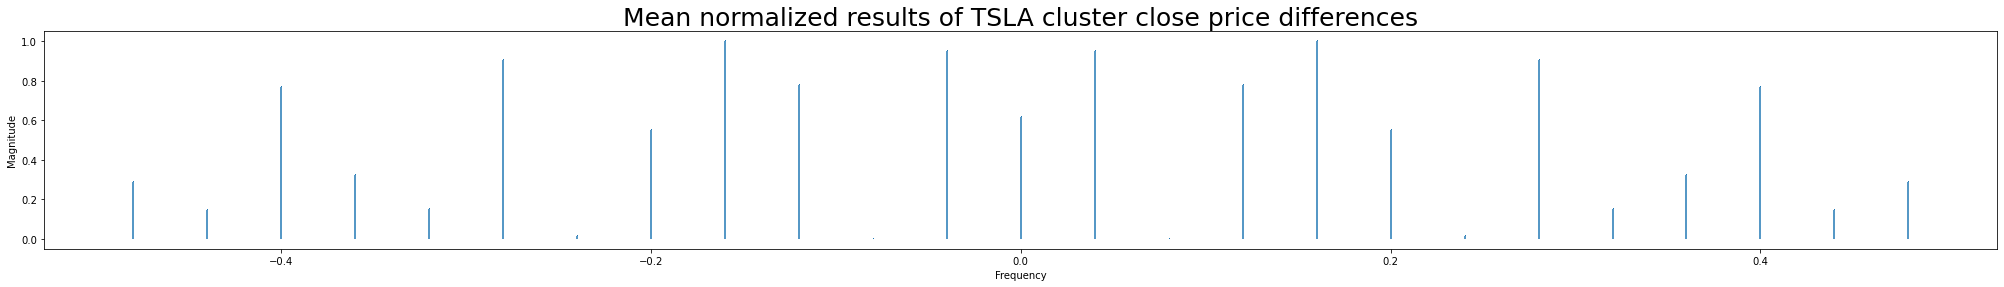

In [761]:
# scaler = MinMaxScaler()
# yf5 = np.abs(yf4)
# scaler.fit(yf5)
# x = scaler.transform(yf5)
fig, ax = plt.subplots()
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
xf = fftfreq(25,1)
plt.title("Mean normalized results of TSLA cluster close price differences", fontsize = 25)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.stem(xf, NormalizeData(np.abs(yf4)),basefmt=" ", markerfmt=",")
fig.set_figheight(4)
fig.set_figwidth(35)
#plt.savefig("fourier of mean stock prices normalized")
plt.show()